In [1]:
#Importing packages
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

#Importing visualization packages
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.ticker import ScalarFormatter

import seaborn as sns

In [2]:
#Importing the data as panda dataframe
df_allrent = pd.read_csv('dbAvgRent2009-2019.csv')

df_allrent.head()

,REF_DATE,GEO,DGUID,Type of structure,Type of unit,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2009,"Montréal, Quebec",2011S0503462,Row and apartment structures of three units an...,Bachelor units,Dollars,81,units,0,v3822821,46.3.1,514.0,NaN,NaN,NaN,0
1,2010,"Montréal, Quebec",2011S0503462,Row and apartment structures of three units an...,Bachelor units,Dollars,81,units,0,v3822821,46.3.1,526.0,NaN,NaN,NaN,0
2,2011,"Montréal, Quebec",2011S0503462,Row and apartment structures of three units an...,Bachelor units,Dollars,81,units,0,v3822821,46.3.1,549.0,NaN,NaN,NaN,0
3,2012,"Montréal, Quebec",2011S0503462,Row and apartment structures of three units an...,Bachelor units,Dollars,81,units,0,v3822821,46.3.1,539.0,NaN,NaN,NaN,0
4,2013,"Montréal, Quebec",2011S0503462,Row and apartment structures of three units an...,Bachelor units,Dollars,81,units,0,v3822821,46.3.1,555.0,NaN,NaN,NaN,0


In [3]:
#Quick look at the data:

df_allrent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056 entries, 0 to 1055
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   REF_DATE           1056 non-null   int64  
 1   GEO                1056 non-null   object 
 2   DGUID              1056 non-null   object 
 3   Type of structure  1056 non-null   object 
 4   Type of unit       1056 non-null   object 
 5   UOM                1056 non-null   object 
 6   UOM_ID             1056 non-null   int64  
 7   SCALAR_FACTOR      1056 non-null   object 
 8   SCALAR_ID          1056 non-null   int64  
 9   VECTOR             1056 non-null   object 
 10  COORDINATE         1056 non-null   object 
 11  VALUE              1005 non-null   float64
 12  STATUS             51 non-null     object 
 13  SYMBOL             0 non-null      float64
 14  TERMINATED         0 non-null      float64
 15  DECIMALS           1056 non-null   int64  
dtypes: float64(3), int64(4),

In [4]:
#Dropping the empty columns (columns with 0 non-null count):
df_allrent = df_allrent.drop(['SYMBOL', 'TERMINATED'], axis=1)

#Dropping columns that do not contribute information for the analysis:
df_allrent = df_allrent.drop(['DGUID', 'UOM', 'UOM_ID', 'SCALAR_FACTOR', 'SCALAR_ID', 'VECTOR', 
                              'COORDINATE', 'STATUS', 'DECIMALS'], axis=1)

df_allrent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056 entries, 0 to 1055
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   REF_DATE           1056 non-null   int64  
 1   GEO                1056 non-null   object 
 2   Type of structure  1056 non-null   object 
 3   Type of unit       1056 non-null   object 
 4   VALUE              1005 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 41.4+ KB


In [5]:
df_allrent

,REF_DATE,GEO,Type of structure,Type of unit,VALUE
0,2009,"Montréal, Quebec",Row and apartment structures of three units an...,Bachelor units,514.0
1,2010,"Montréal, Quebec",Row and apartment structures of three units an...,Bachelor units,526.0
2,2011,"Montréal, Quebec",Row and apartment structures of three units an...,Bachelor units,549.0
3,2012,"Montréal, Quebec",Row and apartment structures of three units an...,Bachelor units,539.0
4,2013,"Montréal, Quebec",Row and apartment structures of three units an...,Bachelor units,555.0
...,...,...,...,...,...
1051,2015,"Vancouver, British Columbia",Apartment structures of six units and over,Three bedroom units,1616.0
1052,2016,"Vancouver, British Columbia",Apartment structures of six units and over,Three bedroom units,1641.0
1053,2017,"Vancouver, British Columbia",Apartment structures of six units and over,Three bedroom units,1812.0
1054,2018,"Vancouver, British Columbia",Apartment structures of six units and over,Three bedroom units,1934.0


In [6]:
#Selecting rows of data which contain information on Toronto, Vancouver, and Calgary markets:

df_toronto = df_allrent.loc[df_allrent['GEO'] == 'Toronto, Ontario']
df_vancouver = df_allrent.loc[df_allrent['GEO'] == 'Vancouver, British Columbia']
df_calgary = df_allrent.loc[df_allrent['GEO'] == 'Calgary, Alberta']

df_rent3 = pd.concat([df_toronto, df_vancouver, df_calgary], axis=0)
df_rent3

,REF_DATE,GEO,Type of structure,Type of unit,VALUE
352,2009,"Toronto, Ontario",Row and apartment structures of three units an...,Bachelor units,758.0
353,2010,"Toronto, Ontario",Row and apartment structures of three units an...,Bachelor units,777.0
354,2011,"Toronto, Ontario",Row and apartment structures of three units an...,Bachelor units,819.0
355,2012,"Toronto, Ontario",Row and apartment structures of three units an...,Bachelor units,837.0
356,2013,"Toronto, Ontario",Row and apartment structures of three units an...,Bachelor units,873.0
...,...,...,...,...,...
699,2015,"Calgary, Alberta",Apartment structures of six units and over,Three bedroom units,1441.0
700,2016,"Calgary, Alberta",Apartment structures of six units and over,Three bedroom units,1468.0
701,2017,"Calgary, Alberta",Apartment structures of six units and over,Three bedroom units,1453.0
702,2018,"Calgary, Alberta",Apartment structures of six units and over,Three bedroom units,1433.0


In [7]:
df_rent3['Type of structure'].unique()

array(['Row and apartment structures of three units and over',
       'Row structures of three units and over',
       'Apartment structures of three units and over',
       'Apartment structures of six units and over'], dtype=object)

In [8]:
#A look at the "Type of structure" column shows that the structures have been classified into the four following categories: 
#"row and apartment stuctures of 3+ units", "row structures of 3+ units", 
#"apartment structures of 3+ units", and "apartment structures of 6+ units"

#Since the "row and apartment stuctures of 3+ units" covers both rows and apartments of 3+ units, if the values of 
#the individual "row structures of 3+ units" and "apartment structures of 3+ units" categories have a small standard deviation
#from the corresponding "row and apartment stuctures of 3+ units" value, 
#the individual row and apartment categories can be dropped.

In [9]:
#FOR TORONTO:

#To check the standard deviation of rents for row and apartments of 3+ units, the "apartment structures of 6+ units"
#category can be dropped for a more accuruate analysis.
df_toronto_rowsapt3 = df_toronto.loc[df_toronto['Type of structure'] != 'Apartment structures of six units and over']

#The average VALUE is calculated for each year and for each type of unit:
toronto_grouping = df_toronto_rowsapt3.groupby(['REF_DATE', 'Type of unit'])
toronto_grouping.agg({'VALUE':['mean', 'std']})

VALUE           
                                     mean        std
REF_DATE Type of unit                               
2009     Bachelor units        758.000000   0.000000
         One bedroom units     925.666667   0.577350
         Three bedroom units  1307.666667  23.245071
         Two bedroom units    1096.000000   0.000000
2010     Bachelor units        777.000000   0.000000
         One bedroom units     944.333333   8.082904
         Three bedroom units  1335.666667  17.953644
         Two bedroom units    1123.333333   0.577350
2011     Bachelor units        819.000000   0.000000
         One bedroom units     979.333333   4.041452
         Three bedroom units  1363.666667  19.655364
         Two bedroom units    1133.333333  26.274195
2012     Bachelor units        837.000000   0.000000
         One bedroom units    1007.000000   0.000000
         Three bedroom units  1409.000000   5.291503
         Two bedroom units    1185.666667   4.618802
2013     Bachelor units        873.000000   0.000000
         One bedroom units    1032.000000   0.000000
         Three bedroom units  1468.333333  19.087518
         Two bedroom units    1174.333333  65.248244
2014     Bachelor units        896.000000   0.000000
         One bedroom units    1037.666667  50.806824
         Three bedroom units  1473.333333  20.033306
         Two bedroom units    1236.333333  25.403412
2015     Bachelor units        937.000000   0.000000
         One bedroom units    1098.000000   8.660254
         Three bedroom units  1523.666667  18.717194
         Two bedroom units    1239.000000  83.144453
2016     Bachelor units        957.000000   0.000000
         One bedroom units    1132.000000   0.000000
         Three bedroom units  1535.666667  27.592269
         Two bedroom units    1309.000000  30.315013
2017     Bachelor units       1013.000000   0.000000
         One bedroom units    1220.000000  45.033321
         Three bedroom units  1610.666667  55.752429
         Two bedroom units    1383.000000  35.510562
2018     Bachelor units       1080.500000   0.707107
         One bedroom units    1261.000000   0.000000
         Three bedroom units  1661.000000  37.040518
         Two bedroom units    1482.666667  26.274195
2019     Bachelor units       1141.500000   0.707107
         One bedroom units    1408.333333  81.983738
         Three bedroom units  1727.000000   7.000000
         Two bedroom units    1579.333333  29.160476

In [10]:
#FOR VANCOUVER:

df_vancouver_rowsapt3 = df_vancouver.loc[df_vancouver['Type of structure'] != 'Apartment structures of six units and over']

#The average VALUE is calculated for each year and for each type of unit:
vancouver_grouping = df_vancouver_rowsapt3.groupby(['REF_DATE', 'Type of unit'])
vancouver_grouping.agg({'VALUE':['mean', 'std']})

VALUE            
                                     mean         std
REF_DATE Type of unit                                
2009     Bachelor units        844.333333   69.859383
         One bedroom units     924.666667    9.814955
         Three bedroom units  1381.666667   15.011107
         Two bedroom units    1229.000000   98.772466
2010     Bachelor units        867.000000   96.994845
         One bedroom units     939.000000    1.732051
         Three bedroom units  1410.000000   10.000000
         Two bedroom units    1264.333333  114.080381
2011     Bachelor units        926.333333  149.537063
         One bedroom units     967.000000    5.196152
         Three bedroom units  1444.000000   19.519221
         Two bedroom units    1300.000000  103.966341
2012     Bachelor units        955.666667  157.042457
         One bedroom units     950.666667   54.270925
         Three bedroom units  1470.666667    9.504385
         Two bedroom units    1326.666667  108.583301
2013     Bachelor units        959.333333  142.609023
         One bedroom units     985.000000   34.641016
         Three bedroom units  1514.000000   16.000000
         Two bedroom units    1342.333333  101.080826
2014     Bachelor units        995.666667  161.370175
         One bedroom units    1011.333333   46.188022
         Three bedroom units  1530.000000   12.000000
         Two bedroom units    1372.000000  100.503731
2015     Bachelor units       1034.666667  168.298346
         One bedroom units    1052.666667   45.610671
         Three bedroom units  1604.666667   10.503968
         Two bedroom units    1447.666667  131.970956
2016     Bachelor units       1118.000000  180.136060
         One bedroom units    1150.000000   15.588457
         Three bedroom units  1657.000000   26.514147
         Two bedroom units    1542.333333  152.198336
2017     Bachelor units       1186.666667  217.663349
         One bedroom units    1211.666667   19.629909
         Three bedroom units  1754.333333   47.521925
         Two bedroom units    1609.333333   94.155899
2018     Bachelor units       1257.000000  184.464089
         One bedroom units    1284.000000   38.974351
         Three bedroom units  1840.333333   83.098335
         Two bedroom units    1685.666667   60.928920
2019     Bachelor units       1266.000000   67.549981
         One bedroom units    1370.000000   20.784610
         Three bedroom units  1986.666667   78.053401
         Two bedroom units    1793.666667   75.659324

In [11]:
#FOR CALGARY:

df_calgary_rowsapt3 = df_calgary.loc[df_calgary['Type of structure'] != 'Apartment structures of six units and over']

#The average VALUE is calculated for each year and for each type of unit:
calgary_grouping = df_calgary_rowsapt3.groupby(['REF_DATE', 'Type of unit'])
calgary_grouping.agg({'VALUE':['mean', 'std']})

VALUE           
                                     mean        std
REF_DATE Type of unit                               
2009     Bachelor units        705.000000   0.000000
         One bedroom units     888.333333  42.723920
         Three bedroom units  1128.000000  53.507009
         Two bedroom units    1071.000000  40.149720
2010     Bachelor units        709.000000   0.000000
         One bedroom units     878.666667  26.558112
         Three bedroom units  1110.333333  53.003145
         Two bedroom units    1053.333333  22.941956
2011     Bachelor units        705.000000   0.000000
         One bedroom units     874.666667  42.146570
         Three bedroom units  1114.000000  36.041643
         Two bedroom units    1064.333333  29.022979
2012     Bachelor units        776.000000   0.000000
         One bedroom units     931.333333  45.324754
         Three bedroom units  1148.000000  51.029403
         Two bedroom units    1133.000000  24.433583
2013     Bachelor units        871.000000   0.000000
         One bedroom units    1019.333333  34.933270
         Three bedroom units  1210.666667  48.013887
         Two bedroom units    1203.333333  29.938827
2014     Bachelor units        905.500000   0.707107
         One bedroom units    1099.000000  59.757845
         Three bedroom units  1298.000000  35.042831
         Two bedroom units    1287.666667  50.242744
2015     Bachelor units        900.000000   0.000000
         One bedroom units    1083.333333  66.108497
         Three bedroom units  1328.000000  40.583248
         Two bedroom units    1292.666667  57.239264
2016     Bachelor units        857.500000   0.707107
         One bedroom units    1001.000000  84.005952
         Three bedroom units  1294.333333  35.529331
         Two bedroom units    1208.666667  72.037028
2017     Bachelor units        824.500000   0.707107
         One bedroom units     988.000000  63.221832
         Three bedroom units  1304.000000  49.507575
         Two bedroom units    1206.000000  60.917978
2018     Bachelor units        878.000000   1.414214
         One bedroom units     999.666667  86.315313
         Three bedroom units  1313.666667  68.061247
         Two bedroom units    1234.000000  57.375953
2019     Bachelor units        898.500000   0.707107
         One bedroom units    1030.666667  84.583292
         Three bedroom units  1340.000000  83.540409
         Two bedroom units    1267.333333  56.800822

In [12]:
#With the standard deviation being small for the majority of the unit types in the three cities,
#we can drop the individual "row structures of 3+ units" and "apartment structures of 3+ units" categories and
#just keep their combined category "row and apartment stuctures of 3+ units".

df_rent1 = df_rent3.loc[df_rent3['Type of structure'] == 'Row and apartment structures of three units and over']
df_rent2 = df_rent3.loc[df_rent3['Type of structure'] == 'Apartment structures of six units and over']

df_rent = pd.concat([df_rent1, df_rent2], axis=0, ignore_index=True)
df_rent

,REF_DATE,GEO,Type of structure,Type of unit,VALUE
0,2009,"Toronto, Ontario",Row and apartment structures of three units an...,Bachelor units,758.0
1,2010,"Toronto, Ontario",Row and apartment structures of three units an...,Bachelor units,777.0
2,2011,"Toronto, Ontario",Row and apartment structures of three units an...,Bachelor units,819.0
3,2012,"Toronto, Ontario",Row and apartment structures of three units an...,Bachelor units,837.0
4,2013,"Toronto, Ontario",Row and apartment structures of three units an...,Bachelor units,873.0
...,...,...,...,...,...
259,2015,"Calgary, Alberta",Apartment structures of six units and over,Three bedroom units,1441.0
260,2016,"Calgary, Alberta",Apartment structures of six units and over,Three bedroom units,1468.0
261,2017,"Calgary, Alberta",Apartment structures of six units and over,Three bedroom units,1453.0
262,2018,"Calgary, Alberta",Apartment structures of six units and over,Three bedroom units,1433.0


In [13]:
#Comparing the rent of bachelor units in Toronto, Vancouver, and Calgary over the years:

df_bachelor = df_rent.loc[df_rent['Type of unit'] == 'Bachelor units']
df_bachelor.groupby(['REF_DATE', 'GEO']).VALUE.mean()

REF_DATE  GEO                        
2009      Calgary, Alberta                707.0
          Toronto, Ontario                759.5
          Vancouver, British Columbia     804.5
2010      Calgary, Alberta                709.5
          Toronto, Ontario                777.5
          Vancouver, British Columbia     811.0
2011      Calgary, Alberta                706.5
          Toronto, Ontario                820.5
          Vancouver, British Columbia     841.5
2012      Calgary, Alberta                777.5
          Toronto, Ontario                839.0
          Vancouver, British Columbia     865.5
2013      Calgary, Alberta                872.5
          Toronto, Ontario                875.5
          Vancouver, British Columbia     877.5
2014      Calgary, Alberta                906.0
          Toronto, Ontario                898.0
          Vancouver, British Columbia     903.0
2015      Calgary, Alberta                902.5
          Toronto, Ontario                939.0
  

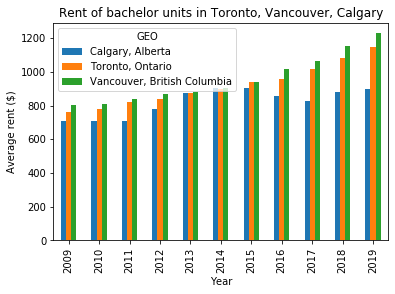

In [14]:
#Comparing the rent of bachelor units in Toronto, Vancouver, and Calgary over the years:

ax1 = df_bachelor.groupby(['REF_DATE', 'GEO']).VALUE.mean().unstack().plot.bar()
ax1.set_title("Rent of bachelor units in Toronto, Vancouver, Calgary")
ax1.set_xlabel("Year")
ax1.set_ylabel("Average rent ($)");

In [15]:
#Comparing the rent of one bedroom units in Toronto, Vancouver, and Calgary over the years:

df_onebedroom = df_rent.loc[df_rent['Type of unit'] == 'One bedroom units']
df_onebedroom.groupby(['REF_DATE', 'GEO']).VALUE.mean()

REF_DATE  GEO                        
2009      Calgary, Alberta                915.5
          Toronto, Ontario                927.0
          Vancouver, British Columbia     920.0
2010      Calgary, Alberta                895.5
          Toronto, Ontario                950.5
          Vancouver, British Columbia     940.5
2011      Calgary, Alberta                901.0
          Toronto, Ontario                978.0
          Vancouver, British Columbia     964.5
2012      Calgary, Alberta                959.0
          Toronto, Ontario               1008.0
          Vancouver, British Columbia     982.5
2013      Calgary, Alberta               1040.5
          Toronto, Ontario               1032.5
          Vancouver, British Columbia    1005.5
2014      Calgary, Alberta               1135.0
          Toronto, Ontario               1068.0
          Vancouver, British Columbia    1039.0
2015      Calgary, Alberta               1123.5
          Toronto, Ontario               1103.0
  

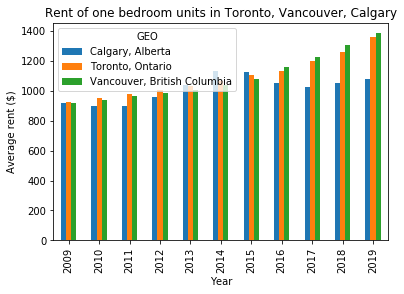

In [16]:
#Comparing the rent of one bedroom units in Toronto, Vancouver, and Calgary over the years:

ax2 = df_onebedroom.groupby(['REF_DATE', 'GEO']).VALUE.mean().unstack().plot.bar()
ax2.set_title("Rent of one bedroom units in Toronto, Vancouver, Calgary")
ax2.set_xlabel("Year")
ax2.set_ylabel("Average rent ($)");

In [17]:
#Comparing the rent of two bedroom units in Toronto, Vancouver, and Calgary over the years:

df_twobedroom = df_rent.loc[df_rent['Type of unit'] == 'Two bedroom units']
df_twobedroom.groupby(['REF_DATE', 'GEO']).VALUE.mean()

REF_DATE  GEO                        
2009      Calgary, Alberta               1104.0
          Toronto, Ontario               1092.5
          Vancouver, British Columbia    1173.0
2010      Calgary, Alberta               1078.5
          Toronto, Ontario               1120.5
          Vancouver, British Columbia    1199.0
2011      Calgary, Alberta               1093.0
          Toronto, Ontario               1148.0
          Vancouver, British Columbia    1242.0
2012      Calgary, Alberta               1158.5
          Toronto, Ontario               1181.5
          Vancouver, British Columbia    1265.0
2013      Calgary, Alberta               1232.0
          Toronto, Ontario               1210.5
          Vancouver, British Columbia    1284.5
2014      Calgary, Alberta               1330.0
          Toronto, Ontario               1250.0
          Vancouver, British Columbia    1315.0
2015      Calgary, Alberta               1337.0
          Toronto, Ontario               1284.5
  

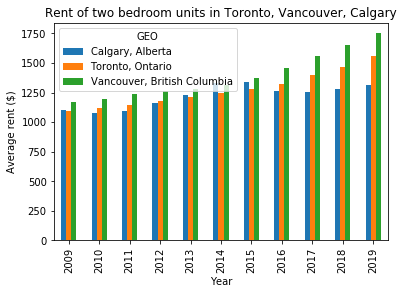

In [18]:
#Comparing the rent of two bedroom units in Toronto, Vancouver, and Calgary over the years:

ax3 = df_twobedroom.groupby(['REF_DATE', 'GEO']).VALUE.mean().unstack().plot.bar()
ax3.set_title("Rent of two bedroom units in Toronto, Vancouver, Calgary")
ax3.set_xlabel("Year")
ax3.set_ylabel("Average rent ($)");

In [19]:
#Comparing the rent of three bedroom units in Toronto, Vancouver, and Calgary over the years:

df_threebedroom = df_rent.loc[df_rent['Type of unit'] == 'Three bedroom units']
df_threebedroom.groupby(['REF_DATE', 'GEO']).VALUE.mean()

REF_DATE  GEO                        
2009      Calgary, Alberta               1193.0
          Toronto, Ontario               1293.0
          Vancouver, British Columbia    1372.5
2010      Calgary, Alberta               1153.5
          Toronto, Ontario               1323.5
          Vancouver, British Columbia    1420.5
2011      Calgary, Alberta               1198.0
          Toronto, Ontario               1352.5
          Vancouver, British Columbia    1462.0
2012      Calgary, Alberta               1228.5
          Toronto, Ontario               1402.0
          Vancouver, British Columbia    1476.0
2013      Calgary, Alberta               1278.5
          Toronto, Ontario               1449.0
          Vancouver, British Columbia    1509.0
2014      Calgary, Alberta               1387.5
          Toronto, Ontario               1451.5
          Vancouver, British Columbia    1541.0
2015      Calgary, Alberta               1386.0
          Toronto, Ontario               1502.0
  

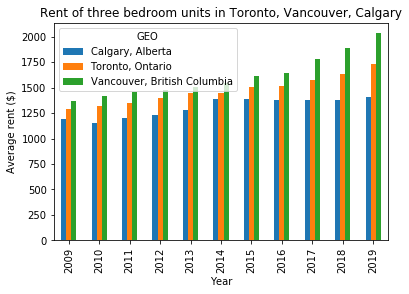

In [20]:
#Comparing the rent of three bedroom units in Toronto, Vancouver, and Calgary over the years:

ax4 = df_threebedroom.groupby(['REF_DATE', 'GEO']).VALUE.mean().unstack().plot.bar()
ax4.set_title("Rent of three bedroom units in Toronto, Vancouver, Calgary")
ax4.set_xlabel("Year")
ax4.set_ylabel("Average rent ($)");

In [21]:
#Observations from the graphs:

#For all cities and as expected, the average rent shows an increase as the bedroom numbers are increased.

#In general and apart from the exception of rent values for one bedroom units from 2009 to 2015, 
#Vancouver has the highest rent for all unit types in all years.

#Toronto and Vancouver show an increase in the amounts of rents from 2009 to 2019 for all unit types.

#The rent values for all unit types in Calgary have a slight increasing trend from 2009 to 2014.
#This initial increase is followed by a decreasing trend for bachelor, one bedroom, and two bedroom units. However,
#for three bedroom units, the rent amounts remain approximately constant from 2014 to 2019.

#While the rent gap between Toronto and Vancouver markets for two and three bedroom units has grown significantly 
#over the years, this gap has remained almost consistent for bachelor and one bedroom units.
#The steeper rent increase for the bachelor and one bedroom units in Toronto has caused the rent prices for these unit types
#to almost catch up to rent values of bachelor and one bedroom units in Vancouver.

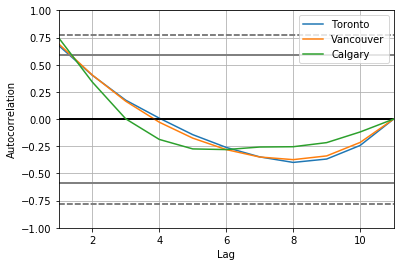

In [22]:
#Autocorrelation plots for rent price of all unit types in Toronto, Vancouver, and Calgary

df_toronto_corr = df_rent.loc[df_rent['GEO'] == 'Toronto, Ontario']
toronto_corr = df_toronto_corr.groupby(['REF_DATE']).VALUE.mean()
toronto_corr_plot = pd.plotting.autocorrelation_plot(toronto_corr, label='Toronto')

df_vancouver_corr = df_rent.loc[df_rent['GEO'] == 'Vancouver, British Columbia']
vancouver_corr = df_vancouver_corr.groupby(['REF_DATE']).VALUE.mean()
vancouver_corr_plot = pd.plotting.autocorrelation_plot(vancouver_corr, label='Vancouver')

df_calgary_corr = df_rent.loc[df_rent['GEO'] == 'Calgary, Alberta']
calgary_corr = df_calgary_corr.groupby(['REF_DATE']).VALUE.mean()
calgary_corr_plot = pd.plotting.autocorrelation_plot(calgary_corr, label='Calgary')

In [23]:
#The autocorrelation plots for all three cities fall within the confidence bands and the rent prices show no significant
#autocorrelation. In other words, past rent prices do not seem to influence future rent prices.

#However, it should be noted that the confidence bands cover a wide range (approximately from -0.75 to +0.75) of the plot. 
#The reason lies in how the confidence intervals are determined. 
#In confidence band calculations, the length of the time series is the denominator of the fraction; therefore,
#shorter time periods will result in wider confidence bands.

#In this analysis, only the years from 2009 to 2019 are investigated; therefore, the length of the time series is equal to 11 
#which is relatively short and results in the wide confidence bands.